# Imports

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy import sparse
from sklearn.ensemble import AdaBoostClassifier

# Load data

In [2]:
trainX=sparse.load_npz('../data/trainsetInputVector_sparse.npz')
trainY = np.genfromtxt('../data/trainsetResult.csv', delimiter='\n')

validX=sparse.load_npz('../data/validsetInputVector_sparse.npz')
validY = np.genfromtxt('../data/validsetResult.csv', delimiter='\n')

testX=sparse.load_npz('../data/testsetInputVector_sparse.npz')
testY = np.genfromtxt('../data/testsetResult.csv', delimiter='\n')

# Original training time with the whole data and subset

In [ ]:
import time

In [ ]:
start_time = time.time()
clf = svm.LinearSVC()
clf.fit(trainX_sub, trainY_sub)
clf.score(validX_sub,validY_sub)
print("--- %s seconds ---" % (time.time() - start_time))

Outputs:  
Score: 0.6235056435574589  
Time:--- 213.39108681678772 seconds ---  

In [ ]:
start_time = time.time()
clf = svm.LinearSVC()
clf.fit(trainX_sub, trainY_sub)
clf.score(validX_sub,validY_sub)
print("--- %s seconds ---" % (time.time() - start_time))

Outputs:   
Score: 0.62531  
Time:--- 8.010278701782227 seconds ---   
Therefore, to make adaboost feasible, **sub dataset** would be used for training

# Adaboost with SVM

Firstly, let's try (at most) 100 estimators

In [ ]:
clf = AdaBoostClassifier(base_estimator=svm.LinearSVC(), n_estimators=100, algorithm='SAMME')
start_time = time.time()
clf.fit(trainX_sub, trainY_sub)
clf.score(validX_sub,validY_sub)
print("--- %s seconds ---" % (time.time() - start_time))

Outputs  
Score: 0.6253  
Time: --- 12.578743696212769 seconds ---   

Then, let's try adaboosts with different maximum estimators

In [ ]:
# define a class to store each trained classifier
class AdaboostWithSVM:
    def __init__(self, clf, time, score):
        self.clf = clf
        self.time = time
        self.score = score
    def getTime():
        return self.time
    def getScore():
        return self.score
    def getClassifier():
        return self.clf

res = []
for n_estimators in np.arange(1,200,10):
    print('processing %d estimators' % n_estimators)
    clf = AdaBoostClassifier(base_estimator=svm.LinearSVC(), n_estimators=n_estimators, algorithm='SAMME')
    start_time = time.time()
    clf.fit(trainX_sub, trainY_sub)
    score = clf.score(validX_sub,validY_sub)
    print("used time --- %s seconds ---" % (time.time() - start_time))
    res.append(AdaboostWithSVM(clf=clf, time=int(time.time() - start_time), score=score))

Scores: [0.6213, 0.62131, 0.6213, 0.6213, 0.62131, 0.62131, 0.6213, 0.62133, 0.62131, 0.6213, 0.62131, 0.6213, 0.6213, 0.62132, 0.62131, 0.62132, 0.62131, 0.62131, 0.62131, 0.62131]

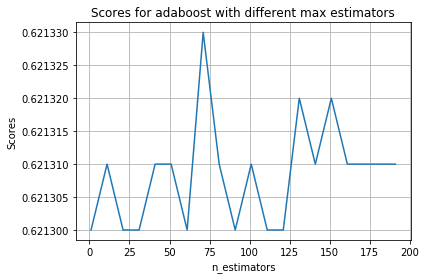

In [13]:
res = [0.6213, 0.62131, 0.6213, 0.6213, 0.62131, 0.62131, 0.6213, 0.62133, 0.62131, 0.6213, 0.62131, 0.6213, 0.6213, 0.62132, 0.62131, 0.62132, 0.62131, 0.62131, 0.62131, 0.62131]
plt.xlabel('n_estimators')
plt.ylabel('Scores')
plt.title('Scores for adaboost with different max estimators')
plt.plot(np.arange(1,200,10), res)
plt.grid(True)


And the estimators for each adaboost is: [1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 4, 3, 4, 2, 2]

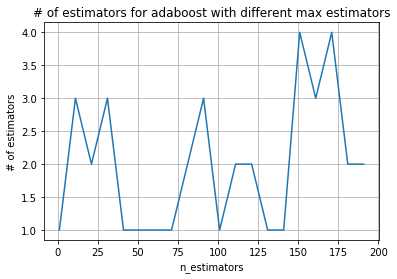

In [14]:
res = [1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 4, 3, 4, 2, 2]
plt.xlabel('n_estimators')
plt.ylabel('# of estimators')
plt.title('# of estimators for adaboost with different max estimators')
plt.plot(np.arange(1,200,10), res)
plt.grid(True)

# Adaboost with Naive Bayes

As NB is quite efficient, therefore the whole training and validation set would be applied instead of sub one

In [ ]:
from sklearn.naive_bayes import BernoulliNB
res_nb = []
for n_estimators in np.arange(1,200,10):
    print('processing %d estimators' % n_estimators)
    clf = AdaBoostClassifier(base_estimator=BernoulliNB(), n_estimators=n_estimators, algorithm='SAMME')
    start_time = time.time()
    clf.fit(trainX, trainY)
    score = clf.score(validX,validY)
    print("used time --- %s seconds ---" % (time.time() - start_time))
    res.append(AdaboostWithSVM(clf=clf, time=int(time.time() - start_time), score=score))

scores: [0.5304898005859783, 0.6128435458917767, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057]

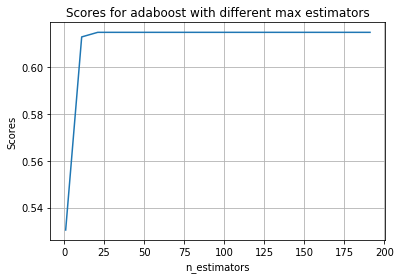

In [16]:
res = [0.5304898005859783, 0.6128435458917767, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057, 0.6148000930625057]
plt.xlabel('n_estimators')
plt.ylabel('Scores')
plt.title('Scores for adaboost with different max estimators')
plt.plot(np.arange(1,200,10), res)
plt.grid(True)


And the estimators for each adaboost is: [1, 11, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]

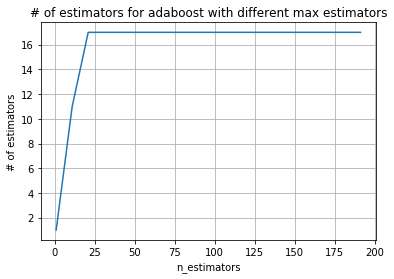

In [17]:
res = [1, 11, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
plt.xlabel('n_estimators')
plt.ylabel('# of estimators')
plt.title('# of estimators for adaboost with different max estimators')
plt.plot(np.arange(1,200,10), res)
plt.grid(True)

# Adaboost with LR

In [ ]:
from sklearn.linear_model import LogisticRegression
res_lr = []
for n_estimators in np.arange(1,200,10):
    print('processing %d estimators' % n_estimators)
    clf = AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1, solver='lbfgs', n_jobs=20), n_estimators=n_estimators, algorithm='SAMME')
    start_time = time.time()
    clf.fit(trainX, trainY)
    score = clf.score(validX,validY)
    print("used time --- %s seconds ---" % (time.time() - start_time))
    res_lr.append(AdaboostWithSVM(clf=clf, time=int(time.time() - start_time), score=score))

Scores: [0.5304898005859783, 0.6123926922273091, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665]

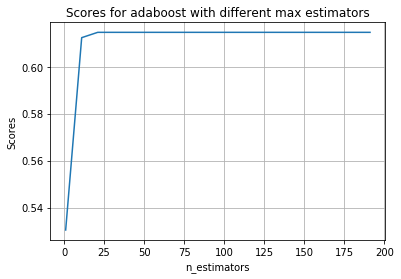

In [18]:
res = [0.5304898005859783, 0.6123926922273091, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665, 0.6146594477502665]
plt.xlabel('n_estimators')
plt.ylabel('Scores')
plt.title('Scores for adaboost with different max estimators')
plt.plot(np.arange(1,200,10), res)
plt.grid(True)


And the estimators for each adaboost is: [1, 11, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]

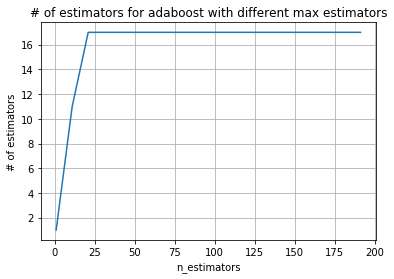

In [19]:
res =  [1, 11, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
plt.xlabel('n_estimators')
plt.ylabel('# of estimators')
plt.title('# of estimators for adaboost with different max estimators')
plt.plot(np.arange(1,200,10), res)
plt.grid(True)

# Self-implemented adaboost

In [ ]:
import math
# assign classes to [-1,1]
trainY[trainY==0] = -1
validY[validY==0] = -1
testY[testY==0] = -1

from sklearn.linear_model import LogisticRegression

n_iterations = 20
def adaboost(trainX, trainY, n_iterations):
    # initialize sample weights
    sample_weights = np.array([1.] * trainX.shape[0])
    # initialize classifier
    clf=LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
    coef = []
    clfs = []
    pres = []
    for i in range(n_iterations):
        clf=LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
        clf.fit(trainX, trainY, sample_weight=sample_weights)
        pre = clf.predict(trainX)
        err = np.sum(sample_weights[trainY!=pre])/np.sum(sample_weights)
        print('error rate of %dth iteration is: %f' % (i, err))
        # compute the alpha and store it
        alpha = 1/2*math.log((1-err)/err)
        print('alpha of %dth iteration is: %f' % (i, alpha))
        updated_weights = sample_weights[trainY!=pre] * math.exp(2*alpha)
        sample_weights[trainY!=pre] = updated_weights
        clfs.append(clf)
        coef.append(alpha)
    output = []
    for i in range(n_iterations):
        output.append(clfs[i].predict(validX)*coef[i])
    ans = np.sum(output,axis=0)
    ans[ans>=0] = 1
    ans[ans<0] = -1
    acc = sum((ans*validY)==1)/len(ans)

The reason for low accuracy when n_estimators = 1 in adaboost: sample weights matters (somehow)

accuracy = 0.5673855350896909

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
logreg.fit(trainX, trainY, sample_weight=np.array([1/trainX.shape[0]] * trainX.shape[0]))
logreg.score(validX,validY)

accuracy = 0.62352338852676

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
logreg.fit(trainX, trainY, sample_weight=[1]*trainX.shape[0])
logreg.score(validX,validY)

accuracy = 0.6235240457478453

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
logreg.fit(trainX, trainY, sample_weight=[10]*trainX.shape[0])
logreg.score(validX,validY)

accuracy = 0.6235477057069135

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
logreg.fit(trainX, trainY, sample_weight=[0.1]*trainX.shape[0])
logreg.score(validX,validY)

accuracy = 0.5965720662636587

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs', n_jobs=20)
logreg.fit(trainX, trainY, sample_weight=[1e-6]*trainX.shape[0])
logreg.score(validX,validY)

Therefore, I assigned unit weights, i.e. 1, to each sample at the begining and trained it. The result is shown as below:

error rate of 0th iteration is: **0.376359**
alpha of 0th iteration is: **0.252516**

error rate of 1th iteration is: **0.494161**
alpha of 1th iteration is: **0.011678**

error rate of 2th iteration is: **0.499704**
alpha of 2th iteration is: **0.000592**

error rate of 3th iteration is: **0.500057**
alpha of 3th iteration is: **-0.000113**

error rate of 4th iteration is: **0.499998**
alpha of 4th iteration is: **0.000003**

error rate of 5th iteration is: **0.500000**
alpha of 5th iteration is: **0.000000**

error rate of 6th iteration is: **0.500000**
alpha of 6th iteration is: **-0.000000**

error rate of 7th iteration is: **0.500000**
alpha of 7th iteration is: **0.000000**

error rate of 8th iteration is: **0.500000**
alpha of 8th iteration is: **-0.000000**  
...  
...  
...  
Accuracy of the strong classifier is **0.62352338852676**

Moreover, self-implemented adaboost with NB produced the similar results, i.e., alpha -> 0